## load dataset

In [1]:
!pip install -q datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 24.6 MB/s eta 0:00:00


In [2]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.4 MB/s eta 0:00:00


In [3]:
num_classes = 10
class_names = ['Tylenol', 'Advil', 'Bayer', 'Aleve', 'Panadol', 'Voltaren', 'Ponstel', 'Dolo', 'Indocin', 'Pyridium']
model_checkpoint = "openai/whisper-base.en"

In [4]:
from datasets import load_dataset

In [5]:
dataset = load_dataset("audiofolder", data_dir="/content/drive/MyDrive/Dataset/fyp_dataset_final", split="train")

Resolving data files:   0%|          | 0/901 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset audiofolder downloaded and prepared to /root/.cache/huggingface/datasets/audiofolder/default-78190304c9a00598/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


In [6]:
from datasets import ClassLabel
medicine_classlabel = ClassLabel(num_classes = num_classes,names = class_names)
dataset = dataset.cast_column("label", medicine_classlabel)

Casting the dataset:   0%|          | 0/900 [00:00<?, ? examples/s]

In [7]:
dataset = dataset.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'label'],
        num_rows: 720
    })
    test: Dataset({
        features: ['audio', 'label'],
        num_rows: 180
    })
})

In [9]:
from datasets import Audio
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))
dataset['test'][0]["audio"]

{'path': '/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Bayer_83.wav',
 'array': array([-4.66173879e-05, -2.39804504e-05,  2.71432018e-05, ...,
        -1.39476191e-02, -1.28824525e-02, -1.25186378e-02]),
 'sampling_rate': 16000}

## get predicitons on whisper-base.en

In [10]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [11]:
processor = WhisperProcessor.from_pretrained(model_checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(model_checkpoint)

In [12]:
transcriptions = []
for input_values in dataset['test']['audio']:
  input_features = processor(input_values["array"], sampling_rate=input_values["sampling_rate"], return_tensors="pt").input_features
  predicted_ids = model.generate(input_features)
  transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)
  transcriptions.append(transcription)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [13]:
label2id, id2label = dict(), dict()
for i, label in enumerate(class_names):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [14]:
print(transcriptions)
actual = [id2label[str(x)] for x in dataset['test']['label']]
print(actual)

[[' Bear!'], [' DOLO'], [' Tailanori'], [' In dosing.'], [' Bye, Lin-ol.'], [' Bye, bye.'], [' DOLO'], [' Bear.'], [' Bear.'], [' Concil.'], [' Periodium.'], [' Any'], [' Indo-sin.'], [" Tailin' on."], [' bye'], [' Walter and'], [' Tylenol'], [' Pawn still.'], [' Pawn still.'], [' bear'], [' Altarin'], [' Bye, Adiab.'], [' Piridium'], [' More dead end.'], [' Tylenol'], [' Indo-syndo.'], [' Panadon!'], [' Walter N'], [' older in'], [' while tiring.'], [' and our goal.'], [' Hello'], [' Indo-sin'], [' Tail and all.'], [' constant'], [' Elu'], [' pen at all.'], [" We're done."], [' PEDIUM'], [' DOLO!'], [' DOLO!'], [" Tailin' on."], [' I live'], [' I leave.'], [' DOLO!'], [' Pyridium.'], [' Bear.'], [' At will.'], [' Bonston.'], [' at will.'], [' Beir!'], [' Adwel.'], [' but still.'], [' Bye, Radium.'], [' Bear.'], [' Indo-sin'], [' Paner dul'], [' Panadol'], [' Hello'], [' It will'], [' Bear.'], [' Bonsoil.'], [' Fan it on.'], [' Hello'], [' Where?'], [' Panadol.'], [' Panadoum'], [' All

In [15]:
transcriptions[0][0]

' Bear!'

In [16]:
transcription_list = transcriptions
transcriptions = []
for item in transcription_list:
  transcriptions.append(item[0])

In [17]:
transcriptions[:5]

[' Bear!', ' DOLO', ' Tailanori', ' In dosing.', ' Bye, Lin-ol.']

## Evaluate predictions

In [18]:
!pip install -q evaluate
!pip install -q jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.5 MB/s eta 0:00:00


In [19]:
from evaluate import load
cer = load("cer")
cer_score = cer.compute(predictions=transcriptions, references=actual)

In [20]:
print(cer_score)

0.6887125220458554


In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [22]:
stopwords = set(STOPWORDS)
prediction_str = ''

for i in range(len(transcriptions)):
  transcriptions[i] = transcriptions[i].lower()

prediction_str += " ".join(transcriptions)+" "
prediction_str

" bear!  dolo  tailanori  in dosing.  bye, lin-ol.  bye, bye.  dolo  bear.  bear.  concil.  periodium.  any  indo-sin.  tailin' on.  bye  walter and  tylenol  pawn still.  pawn still.  bear  altarin  bye, adiab.  piridium  more dead end.  tylenol  indo-syndo.  panadon!  walter n  older in  while tiring.  and our goal.  hello  indo-sin  tail and all.  constant  elu  pen at all.  we're done.  pedium  dolo!  dolo!  tailin' on.  i live  i leave.  dolo!  pyridium.  bear.  at will.  bonston.  at will.  beir!  adwel.  but still.  bye, radium.  bear.  indo-sin  paner dul  panadol  hello  it will  bear.  bonsoil.  fan it on.  hello  where?  panadol.  panadoum  allelu.  tailin' on!  periodium.  tylenol  elite.  tylenol  dolo!  ellu  and nothing.  pen at all  bye bye  indosyn  whole terrain.  that will  allew.  allelu.  world at end.  dolo!  good day.  bear!  whole terrain  viridium.  benadol  tylenol  indosin  tylenol  man  indo-sinni  tylenol  all turn.  pawn still  bon still.  doleo!  dolo  st

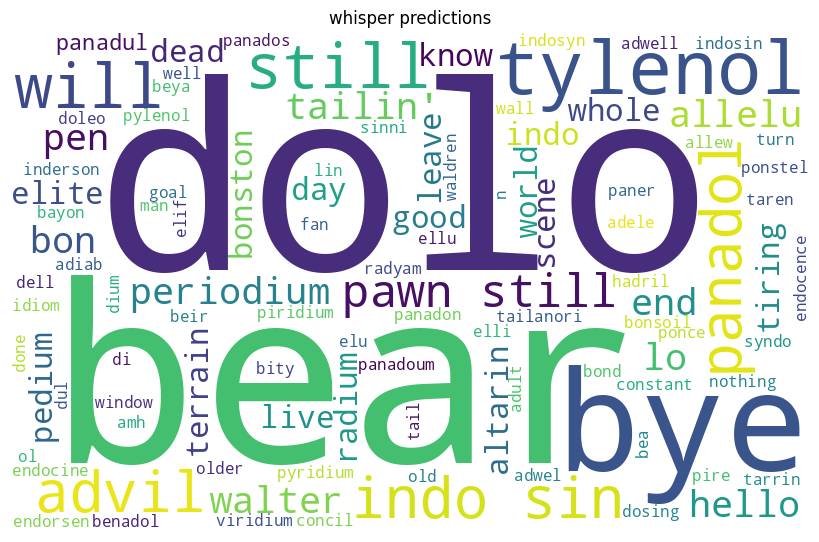

In [23]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(prediction_str)

plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('whisper predictions')
plt.show()